<a href="https://colab.research.google.com/github/naziyainamdar/NNDL-Lab/blob/main/1__ANN_XOR_gate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
data = [[0,0,1,1],[0,1,0,1]]
X = np.array(data)

In [4]:
result_and = [[0,0,0,1]]
result_or = [[0,1,1,1]]
result_xor = [[0,1,1,0]]

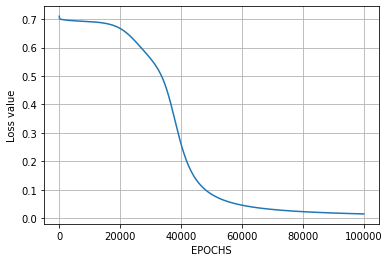

In [5]:
Y = np.array(result_xor)

def activate(x):
    return 1/(1+np.exp(-x))
def intialize_params(inputfeatures , hiddenneurons , outputfeatures):
    W1=np.random.randn(hiddenneurons, inputfeatures)
    W2=np.random.randn(outputfeatures, hiddenneurons)
    b1=np.zeros((hiddenneurons,1))
    b2=np.zeros((outputfeatures,1))
    
    params = {
        "W1":W1,
        "W2":W2,
        "b1":b1,
        "b2":b2,
    }
    return params

def forward(X, Y, params):
    n = X.shape[1]
    W1 = params["W1"]
    W2 = params["W2"]
    b1 = params["b1"]
    b2 = params["b2"]
    
    Z1= np.dot(W1,X)+b1
    A1= activate(Z1)
    Z2= np.dot(W2,A1)+b2
    A2= activate(Z2)
    
    cache = (Z1,A1,W1,b1, Z2,A2,W2,b2)
    logprobs = np.multiply(np.log(A2), Y)+ np.multiply(np.log(1-A2),(1-Y))
    cost = -np.sum(logprobs)/n
    return cost, cache, A2
    
def backprop(X ,Y, cache):
    n = X.shape[1]
    (Z1,A1,W1,b1, Z2,A2,W2,b2)= cache
    
    dz2= A2-Y
    dW2= np.dot(dz2,A1.T)/n
    db2= np.sum(dz2,axis=1, keepdims=True)
    
    dA1= np.dot(W2.T, dz2)
    dz1= np.multiply(dA1, A1*(1- A1))
    
    dW1= np.dot(dz1,X.T)/n
    db1= np.sum(dz1,axis = 1,keepdims = True)/n
    
    gradient= {"dZ2": dz2, "dW2": dW2, "db2": db2,
                 "dZ1": dz1, "dW1": dW1, "db1": db1}
    return gradient
    
def update_params(params,gradient,Lr):
    params["W1"]= params["W1"]-Lr*gradient["dW1"]
    params["W2"]= params["W2"]-Lr*gradient["dW2"]
    params["b1"]= params["b1"]-Lr*gradient["db1"]
    params["b2"]= params["b2"]-Lr*gradient["db2"]
    return params

hiddenneurons = 2
inputfeatures= X.shape[0]
outputfeatures= Y.shape[0]
params = intialize_params(inputfeatures, hiddenneurons, outputfeatures)
epochs= 100000
Lr= 0.01
losses = np.zeros((epochs,1))

for i in range(epochs):
    losses[i,0], cache, A2 = forward(X,Y,params)
    gradient = backprop(X, Y,cache)
    param = update_params(params,gradient,Lr)

plt.grid(True)
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

In [6]:
X_new = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) 
# print(X)
_, _, A2 = forward(X_new, Y, params)
print(A2)
prediction = np.zeros((A2.size))

for a in A2:
    for i in range(4):
        if(a[i]>0.5):
            prediction[i]=1.0

print(prediction)

[[0.98567734 0.01366664 0.01606333 0.9829519 ]]
[1. 0. 0. 1.]


In [7]:
X = np.array([[1,1],[1,0],[0,1],[0,0]]) 
X_new = np.array([[1,0],[1,1],[0,0],[0,1]]) 
result_xor = [0,1,1,0]
Y= np.array(result_xor)

In [8]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=0.00001 ,hidden_layer_sizes=(5, 4), random_state=1)
clf.fit(X, Y)
Y_pred= clf.predict(X_new)
print(Y_pred)

[1 0 0 1]


In [9]:
def Step_activation(x):
    if x>=0:
        return 1
    else:
        return 0

def model(x,w,b):
    o1= np.dot(x,w)+ b
    y= Step_activation(o1)
    return y

def not_model(x):
    w= -1
    b= 0.5
    return model(x,w,b)

def and_model(x):
    w= np.array([1,1])
    b= -1.5
    return model(x,w,b)

def or_model(x):
    w= np.array([1,1])
    b= -0.5
    return model(x,w,b)

def xor_model(x):
    y1= and_model(x)
    y2= or_model(x)
    y3= not_model(y1)
    x_new= np.array([y2,y3])
    return and_model(x_new)
    
test_all = np.array([[0,0],[0,1],[1,0],[1,1]])

for test in test_all:
    print("XOR({}, {}) = {}".format(test[0], test[1], xor_model(test)))

XOR(0, 0) = 0
XOR(0, 1) = 1
XOR(1, 0) = 1
XOR(1, 1) = 0
